In [41]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
x,Y=make_blobs(n_features=2,n_samples=1000,centers=3)

In [49]:
x.shape,Y.shape

((1000, 2), (1000,))

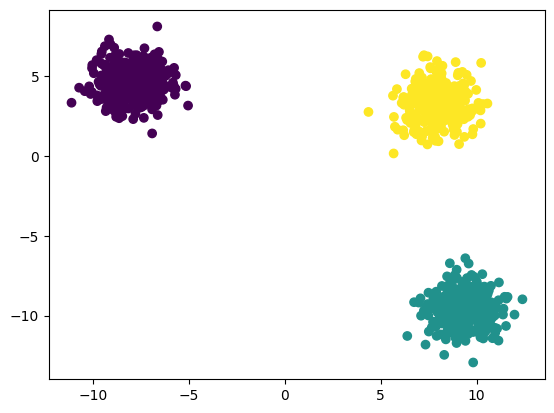

In [13]:
plt.scatter(x=x[:,0],y=x[:,1],c=Y)
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=43)

In [16]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [65]:
wcss=[]
score=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,init="k-means++")
    model.fit(x_train_scaled)
    wcss.append(model.inertia_)

wcss

[1600.0000000000014,
 586.4255708328348,
 31.907430971580414,
 27.874365961848998,
 25.062073765074274,
 19.902801698893157,
 17.97481531479395,
 16.077405833287337,
 14.289639826964514,
 12.818137722395555]

In [53]:
model.labels_

array([5, 5, 5, 5, 4, 1, 9, 8, 3, 3, 9, 3, 3, 5, 7, 8, 8, 2, 2, 3, 1, 6,
       0, 1, 0, 1, 6, 2, 4, 6, 8, 4, 6, 9, 6, 7, 4, 9, 5, 0, 4, 3, 0, 1,
       0, 3, 2, 5, 6, 5, 7, 4, 9, 4, 1, 2, 7, 1, 5, 1, 5, 6, 4, 2, 5, 3,
       5, 7, 6, 6, 6, 9, 4, 5, 2, 3, 9, 4, 6, 1, 4, 1, 3, 6, 8, 4, 1, 8,
       3, 6, 9, 0, 5, 1, 4, 3, 0, 5, 1, 8, 0, 3, 4, 1, 6, 4, 7, 3, 3, 3,
       6, 5, 4, 3, 1, 4, 8, 4, 9, 8, 7, 8, 2, 5, 2, 5, 4, 3, 3, 1, 9, 3,
       3, 7, 5, 5, 5, 7, 3, 0, 7, 4, 0, 4, 4, 7, 8, 3, 7, 4, 3, 3, 6, 2,
       7, 2, 7, 4, 5, 4, 9, 8, 3, 7, 1, 3, 5, 2, 0, 5, 7, 1, 0, 4, 0, 4,
       4, 5, 1, 5, 6, 7, 5, 3, 6, 0, 4, 4, 3, 1, 6, 2, 4, 5, 0, 1, 1, 5,
       6, 3, 6, 5, 4, 5, 6, 5, 5, 6, 3, 8, 0, 1, 6, 7, 3, 6, 0, 0, 5, 7,
       8, 0, 0, 0, 5, 1, 0, 1, 5, 4, 0, 6, 6, 5, 7, 5, 3, 2, 1, 8, 5, 7,
       6, 3, 0, 6, 0, 0, 2, 0, 5, 5, 5, 6, 4, 5, 8, 8, 5, 2, 4, 7, 2, 8,
       7, 7, 3, 8, 0, 1, 0, 5, 1, 3, 2, 3, 3, 2, 5, 5, 0, 5, 6, 5, 8, 1,
       3, 7, 0, 1, 6, 0, 6, 7, 8, 6, 1, 4, 3, 1, 1,

### Finding Optimal Value of K

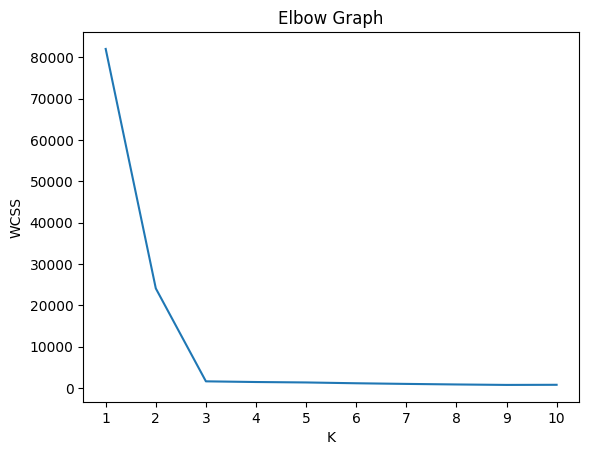

In [38]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("K")
plt.title("Elbow Graph")
plt.ylabel("WCSS")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

In [55]:
score=[]
for k in range(2,11):
    model=KMeans(n_clusters=k,init="k-means++")
    model.fit(x_train_scaled)
    output=silhouette_score(x_train_scaled,model.labels_)
    score.append(output)

In [56]:
score

[0.6593828751970441,
 0.8737982588448472,
 0.6752859523963195,
 0.6882958375037347,
 0.3417892384690522,
 0.3075553074464189,
 0.32903175433899146,
 0.3257584201138953,
 0.32617441033096256]

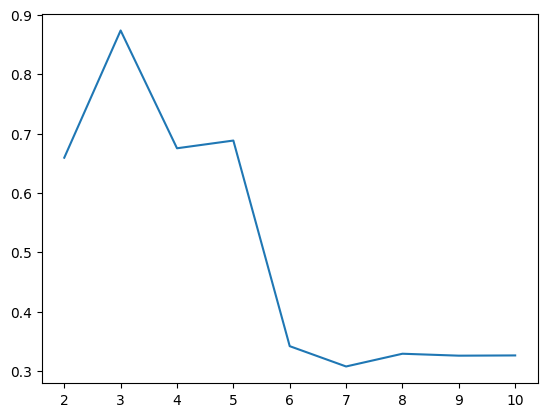

In [57]:
plt.plot(range(2,11),score)
plt.xticks(range(2,11))
plt.show()

In [58]:
!pip install kneed

In [59]:
from kneed import KneeLocator

In [74]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [75]:
kl.elbow

3

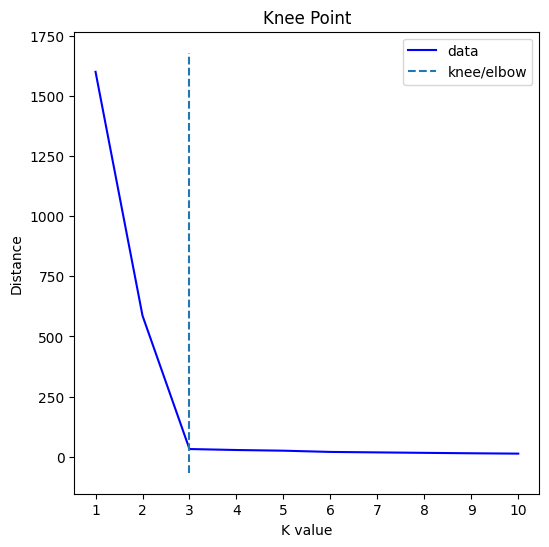

In [78]:
kl.plot_knee(xlabel="K value",ylabel="Distance")
plt.xticks(range(1,11))
plt.show()

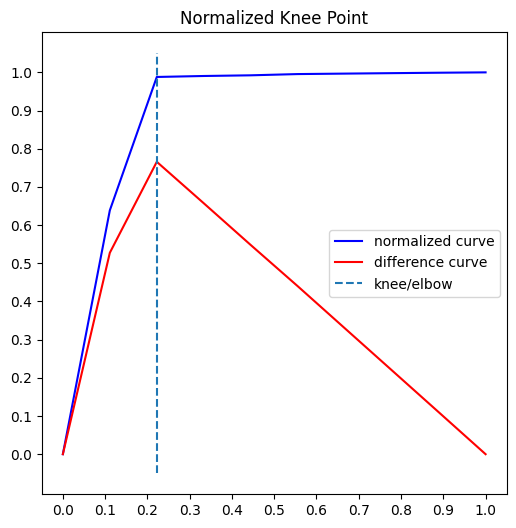

In [69]:
kl.plot_knee_normalized()